## DSP LAB ASSIGNMENT 4

In [1]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import cmath

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set plot size for all plots
plt.rcParams["figure.figsize"] = (20,6)

### Q.1.
#### Consider the discrete time periodic signal of period N = 20 as given below:
$$ x[n] =\begin{cases} 
    1 & \text{-2 $\leq$ $n$ $\leq 2$ }\\ 
    0 & \text{otherwise}\\ 
    \end{cases} $$
#### where n is the discrete time sequence
#### (a) Plot the sequence x[n] for 4 time periods
#### (b) Determine and plot the magnitude, |$c_k$| and phase coefficients, ∠$c_k$ of discrete time Fourier series (DTFS) of x[n].

##### Discrete Time fourier Series (DTFS) is given by:
$$ x[n] = \sum_{k=0}^{N-1} C_{k}e^{jwn} $$
##### and  DTFS coefficient is given by
$$ C_{K} = \frac{1}{N} \sum_{n=0}^{N-1} x[n]e^{-jkwn} $$

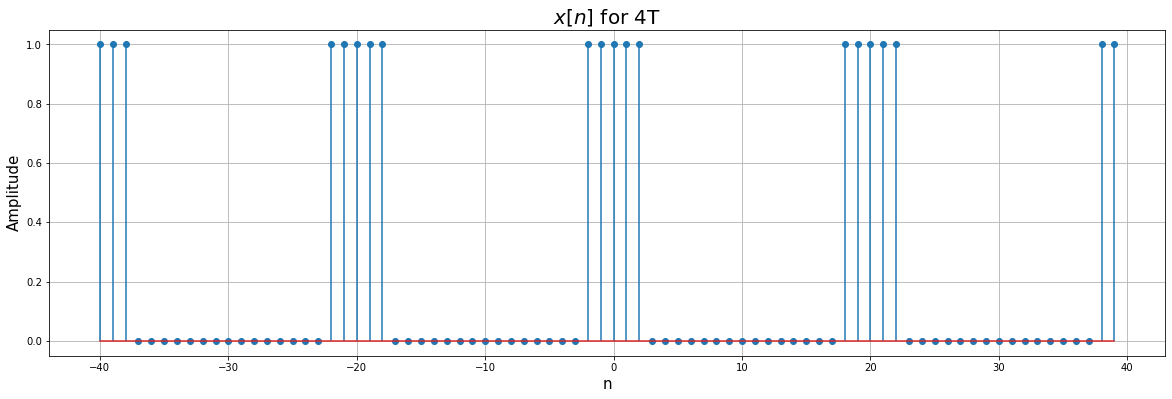

In [2]:
#fn for q1 Xn
def q1X(x):
    return (1 * (np.abs(x) % 20 <= 2) | (np.abs(x) % 20 >= 18))
x=np.arange(-40,40)
q1_xn=q1X(x)

#plotting
plt.stem(x,q1_xn)
plt.xlabel('n' , size = 15 )
plt.ylabel("Amplitude", size= 15)
plt.title('$x[n]$ for 4T' , size = 20 )
plt.grid()
plt.show()

In [3]:
def DTFS(x,low=-10,high=10):
    #low and high are range of coefficients to which we want from  -10 to 9 coeff we get
    N = len(x)
    coff = []
    for k in range(low,high):
        temp_sum = 0
        for n in range(N):
            temp_sum = temp_sum + (x[n]*np.exp(-1j*k*2*np.pi/N*n))/N
        coff.append(temp_sum)
    return np.array(coff),abs(np.array(coff)),np.angle(np.array(coff))


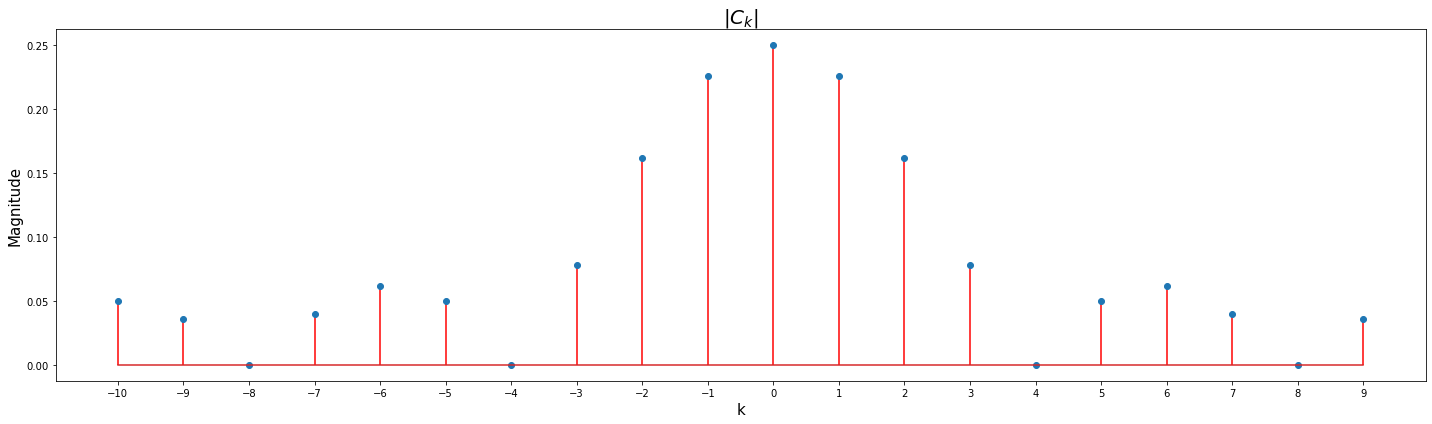

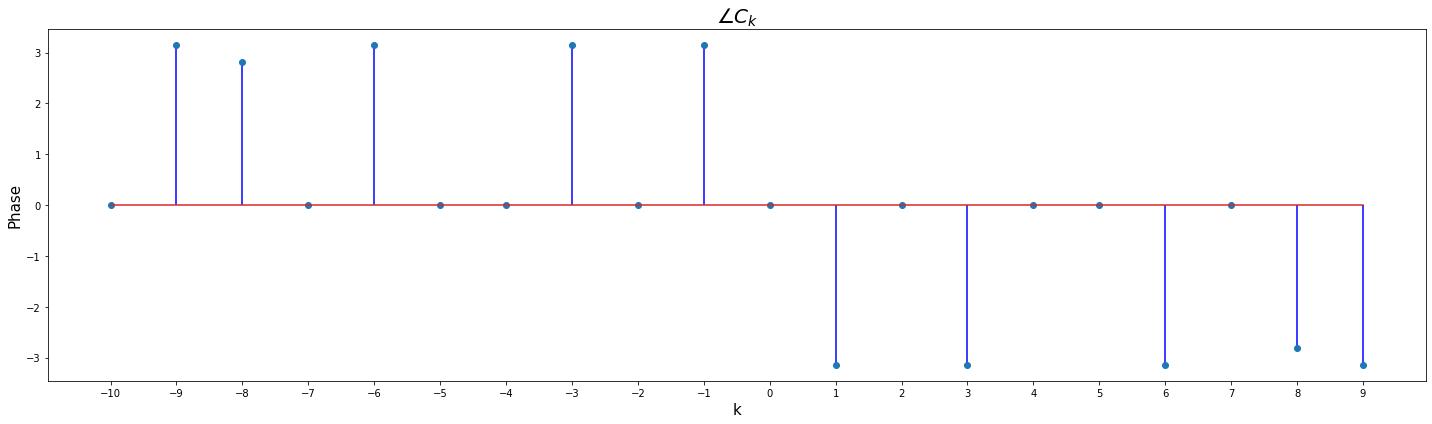

In [4]:
#ip, dtfs
x1=np.arange(-10,10)
q1_xn1=q1X(x1)
x1_dtfs,x1_dtfs_mag , x1_dtfs_ph = DTFS(q1_xn1)

#plotting
plt.stem(x1, x1_dtfs_mag,'r')
plt.xticks(x1)
plt.xlabel('k' , size = 15 )
plt.ylabel("Magnitude", size= 15)
plt.title('$|C_k|$' , size = 20 )
plt.tight_layout()
plt.show()

plt.stem(x1, x1_dtfs_ph,'b')
plt.xticks(x1)
plt.xlabel('k' , size = 15 )
plt.ylabel("Phase", size= 15)
plt.title(r'$\angle C_k$', size = 20 )
plt.tight_layout()
plt.show()

## Q2
#### For x[n] in Question 1, the reconstructed signal is given by
$$ \hat x[n] = \sum_{k=-M}^{M} c_{k}e^{jk(2\pi/N)n} $$
#### (a) Reconstruct x[n] from 5 DTFS coefficients (i.e., M = 2) and plot the original signal (x[n]) and the reconstructed signal (xhat[n]).
#### (b) Reconstruct x[n] from 11 DTFS coefficients (i.e., M = 5) and plot the original signal (x[n]) and the reconstructed signal (ˆxhat[n]).

In [5]:
#fn for x_hat_n
def reconstruct(coeff,M,N):
    x_hat = []
    for n in range(N):
        temp_sum = 0
        for k in range(-M,M+1):
            temp_sum = temp_sum + coeff[k+M]*np.exp(1j*k*2*np.pi/N*n)
        x_hat.append(temp_sum)
    return np.array(x_hat)

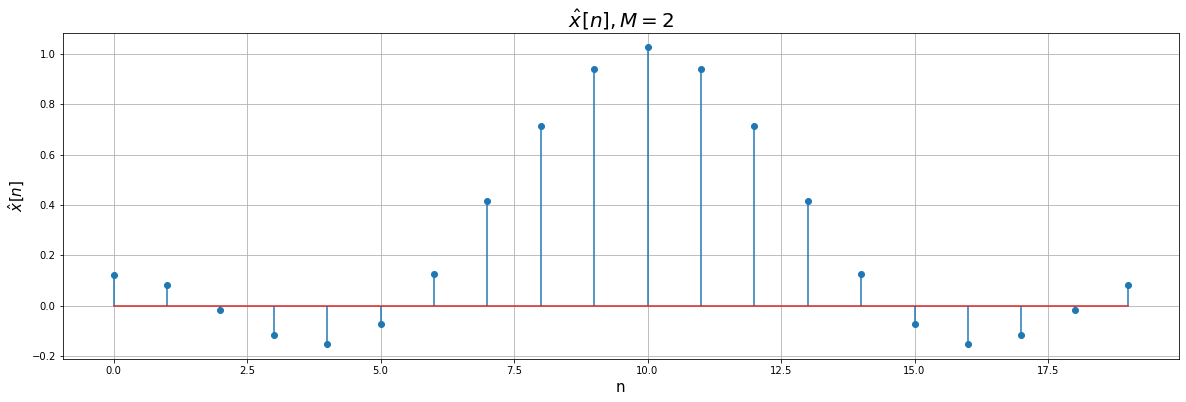

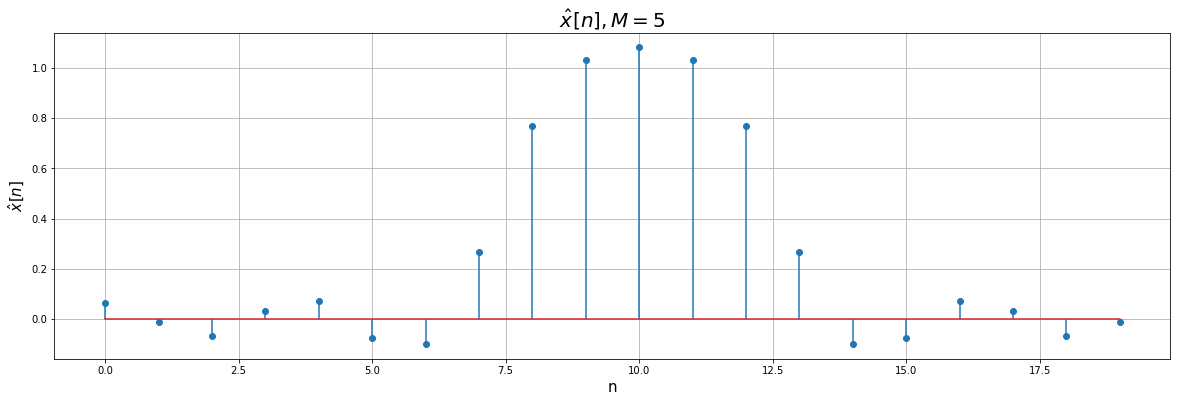

In [6]:
q2_DTFS_2 = DTFS(q1_xn1,-2,3)
q2_DTFS_5 = DTFS(q1_xn1,-5,6)
q1_xn1_recon2 = reconstruct(q2_DTFS_2[0],2,20)
q1_xn1_recon5 = reconstruct(q2_DTFS_5[0],5,20)

#plotting
plt.stem(q1_xn1_recon2.real)
plt.xlabel('n' , size = 15 )
plt.ylabel('$\hat x[n]$', size= 15)
plt.title('$\hat x[n] ,  M = 2$' , size = 20)
plt.grid()
plt.show()

plt.stem(q1_xn1_recon5.real)
plt.xlabel('n' , size = 15 )
plt.ylabel('$\hat x[n]$', size= 15)
plt.title('$\hat x[n] ,  M = 5$' , size = 20 )
plt.grid()
plt.show()

## Q3
#### In the context of discrete time Fourier series, for a discrete time signal x[n], the Parseval’s relation is given by
$$ \frac{1}{N} \sum_{n=<N>} |x[n]|^{2} = \sum_{k=<N>} |c_{k}|^{2}$$
#### (a) If x[n] = 1+ sin (2πn/N)+3 cos (2πn/N) (with time period, N = 8), plot x[n] and the magnitude of DTFS coefficients of x[n].
#### (b) Verify the Parseval’s relation for x[n].

Power of the signal = 6.0


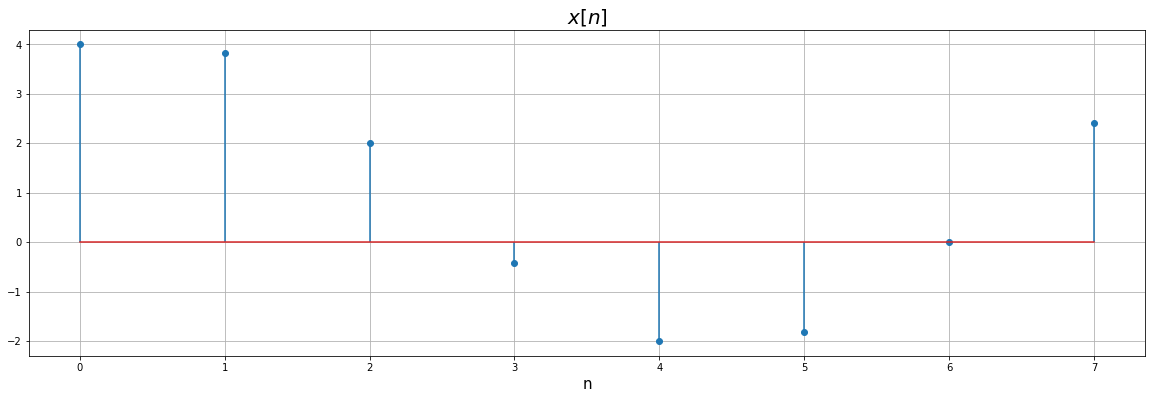

In [7]:
N = 8
x3 = np.arange(N)
q3_xn = (1 + np.sin(2*np.pi*x3/N) +  3 * np.cos(2*np.pi*x3/N))
q3_xn_pwr = (1/N) * np.power(q3_xn,2).sum()
print(f'Power of the signal = {q3_xn_pwr}')

#plotting
plt.stem(x3,q3_xn)
plt.grid()
plt.xlabel('n' , size = 15 )
plt.title('$x[n]$' , size = 20 )
plt.show()

Power of the signal = 6.0
Power of the signal calculated using Parseval’s theorem = 6.0000000000000036


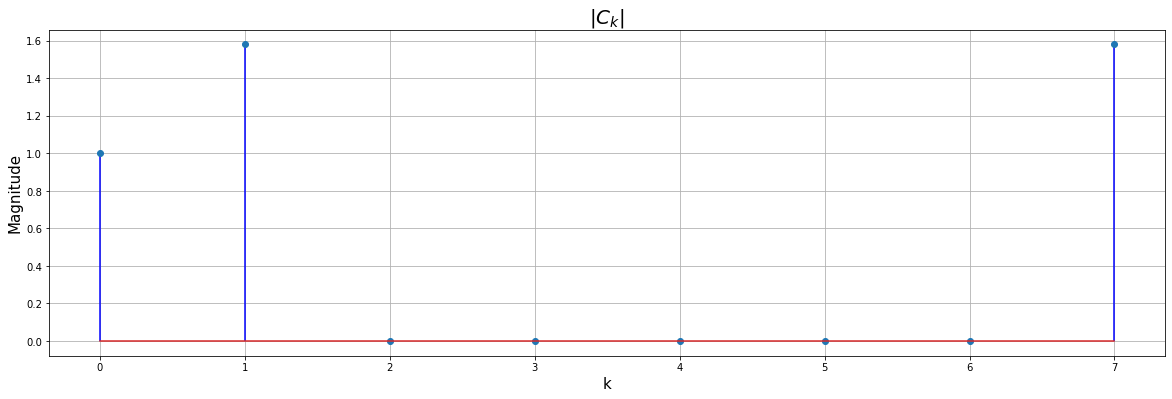

In [8]:
q3xn_dtfs_mag = DTFS(q3_xn,0,8)[1]

print(f'Power of the signal = {q3_xn_pwr}')
q3_xn_pwr_pt = np.power(q3xn_dtfs_mag,2).sum()
print(f'Power of the signal calculated using Parseval’s theorem = {q3_xn_pwr_pt}')

#plotting
plt.stem(x3,q3xn_dtfs_mag,'b')
plt.xlabel('k' , size = 15 )
plt.ylabel('Magnitude' , size = 15 )
plt.title('$|C_k|$' , size = 20 )
plt.grid()
plt.show()

## Q4
#### Compute the Fourier transform X$(e^{jω}$) of the signal x[n] shown in Fig. 1 and plot its magnitude and phase over the interval ω ∈ [−π, π].

In [9]:
#fn for dtft
def DTFT(x , omg):
    omg=omg
    dtft = np.zeros(len(omg),dtype = np.complex) 
    for i in range(len(omg)):
        var = np.complex()
        for k in range(len(x)):
            var += (np.complex(x[k]) * np.exp(-1j*omg[i]*k))
        dtft[i] = var    
    return dtft


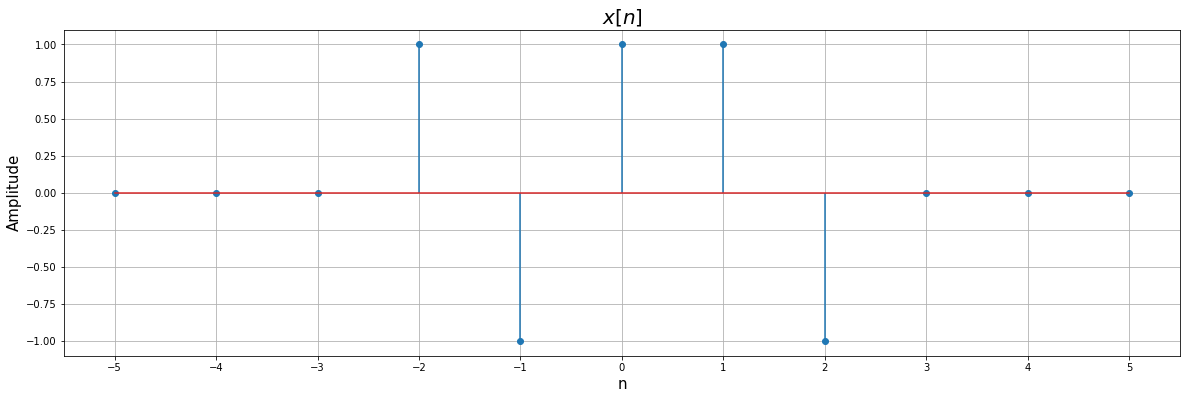

In [10]:
#q4 ip
x4 = np.arange(-5,6)
q4_xn = [0,0,0,1,-1,1,1,-1,0,0,0]

#plotting
plt.stem(x4,q4_xn)
plt.xlabel('n' , size = 15 )
plt.ylabel('Amplitude' , size = 15 )
plt.title('$x[n] $' , size = 20 )
plt.xticks(x4)
plt.grid()
plt.show()

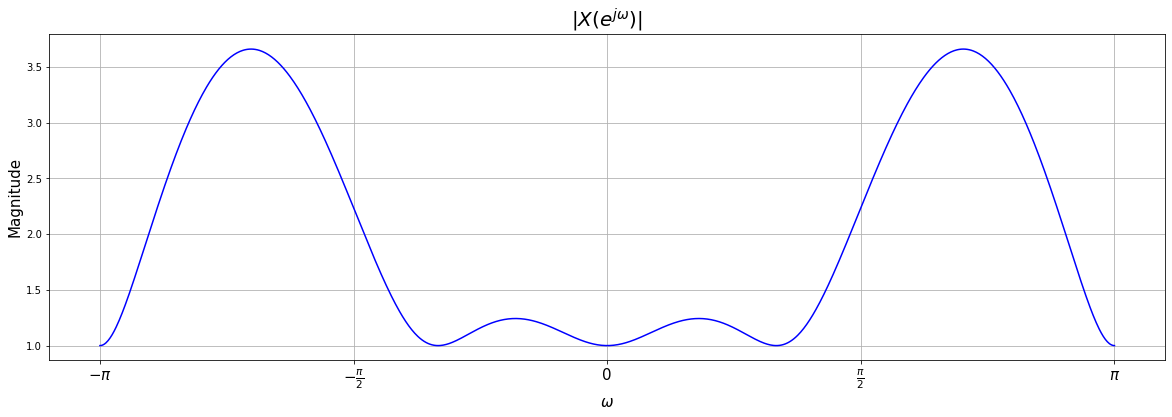

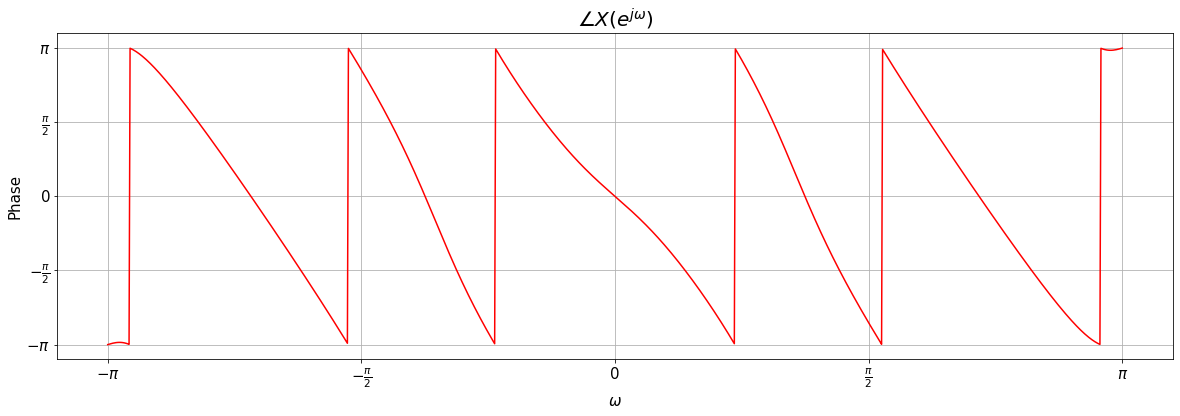

In [11]:
omg = np.linspace(-np.pi , np.pi , 1000)
q4xn_dtft = DTFT(q4_xn , omg )
#dtft mag,phase
q4_dtft_mag = np.abs(q4xn_dtft)
q4_dtft_phs = list(map(lambda x: cmath.phase(x) , q4xn_dtft))


#plotting
plt.plot(omg , q4_dtft_mag,'b')
plt.title(r'$\|X(e^{j\omega})|$' , size= 20)
plt.xlabel('$\omega$' , size = 15)
plt.ylabel('Magnitude', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()

plt.plot(omg , q4_dtft_phs, 'r')
plt.title(r'$\angle X(e^{j\omega})$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Phase', size = 15 )
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.yticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.show()

## Q5
#### Given an LTI system with impulse response h[n] = u[n] and an input x[n] = $(0.8)^{n}u[n]$, compute the DTFT of the output $Y(e^{ jω})$ and its inverse DTFT y[n].

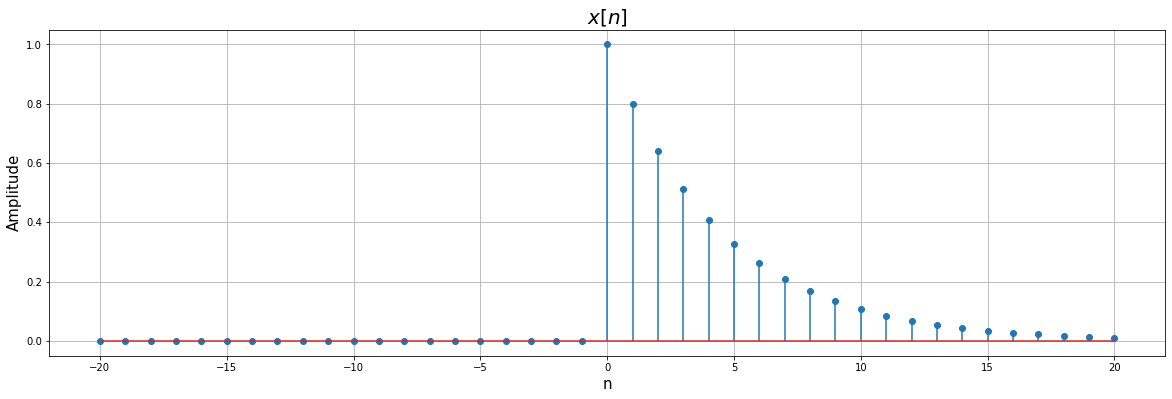

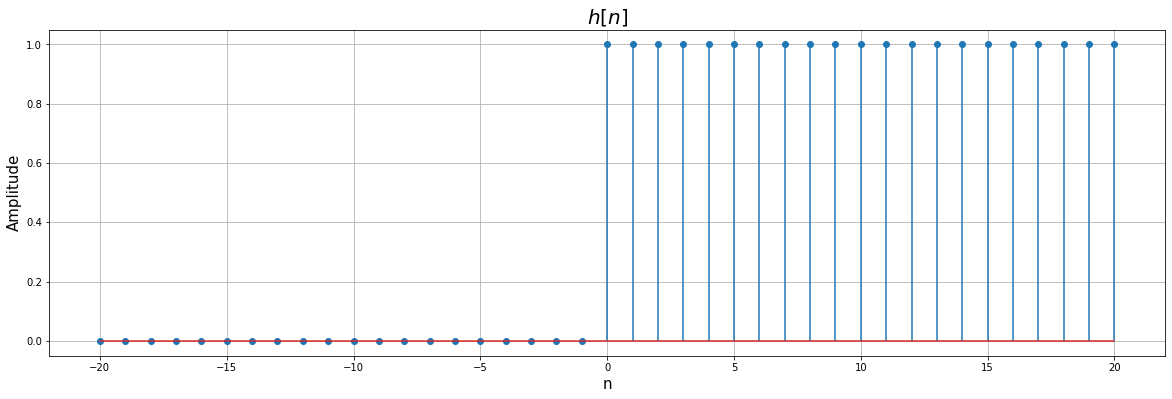

In [12]:
x5 = np.arange(-20,21)
#q5 ip xn,hn
q5_hn = 1*(x5 >= 0)
q5_xn = np.power(0.8,x5)*q5_hn

#plotting
plt.stem(x5,q5_xn)
plt.xlabel('n' , size = 15 )
plt.ylabel("Amplitude", size= 15)
plt.title('$x[n]$' , size = 20)
plt.grid()
plt.show()

plt.stem(x5,q5_hn)
plt.xlabel('n' , size = 15 )
plt.ylabel("Amplitude", size= 15)
plt.title('$h[n]$' , size = 20 )
plt.grid()
plt.show()

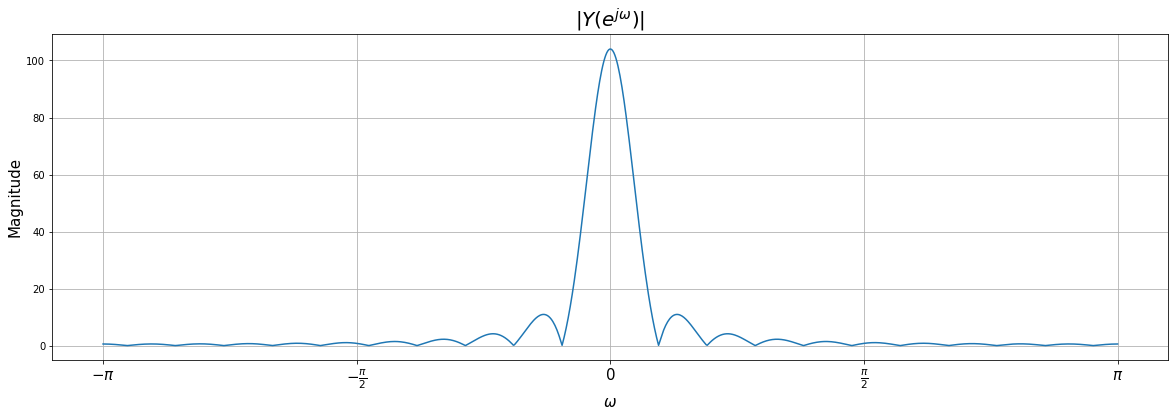

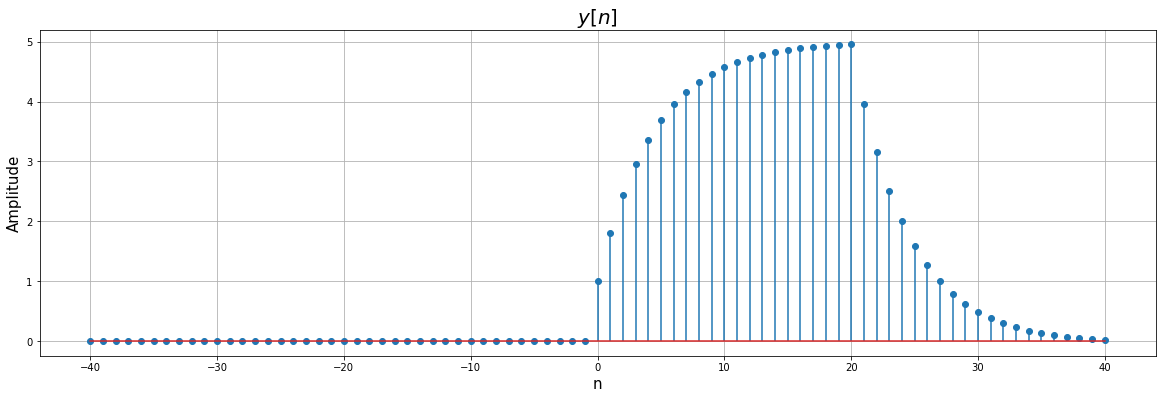

In [13]:
q5_omg = np.linspace(-np.pi,np.pi,1000)
q5_xn_dtft = DTFT(q5_xn,q5_omg)
q5_hn_dtft = DTFT(q5_hn , q5_omg)
q5_yn_dtft = q5_xn_dtft * q5_hn_dtft

#plotting
plt.plot(q5_omg , np.abs(q5_yn_dtft))
plt.title(r'$\|Y(e^{j\omega})|$' , size= 20)
plt.ylabel("Magnitude", size= 15)
plt.xlabel('$\omega$' , size = 15 )
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.show()

y5 = np.convolve(q5_xn ,q5_hn)
plt.stem(np.arange(-40,41),y5)
plt.grid()
plt.xlabel('n' , size = 15 )
plt.ylabel("Amplitude", size= 15)
plt.title('$y[n]$' , size = 20 )
plt.show()


## Q6
#### Use the DFT to compute approximately the first 64 Fourier coefficients of the function
$$ f(t) = e^{-t^{2}/10}[sin2t + 2 cos4t + 0.4sint sin10t]$$
#### on the interval [0, 2π].
#### (a) Plot f(t)
#### (b) Compute the coefficients and plot them. Use the following transformation to compute DFT. Y = Wf

In [14]:
#fn for dft matrix
def DFT_Matrix(N):   
    var = np.zeros((N,N),dtype=np.complex64)
    for i in range(N):
        for n in range(N):
            var[i][n] = np.exp(-1j*2*np.pi*i*n/N)
    return var

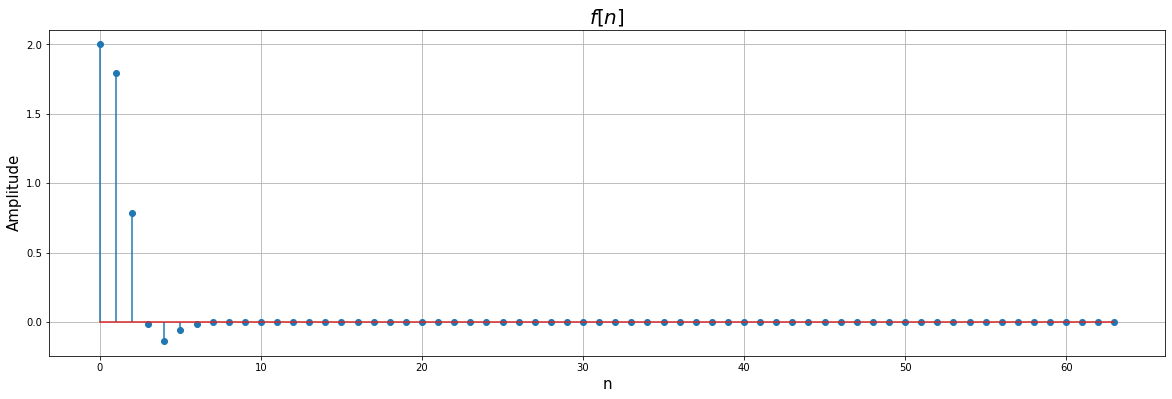

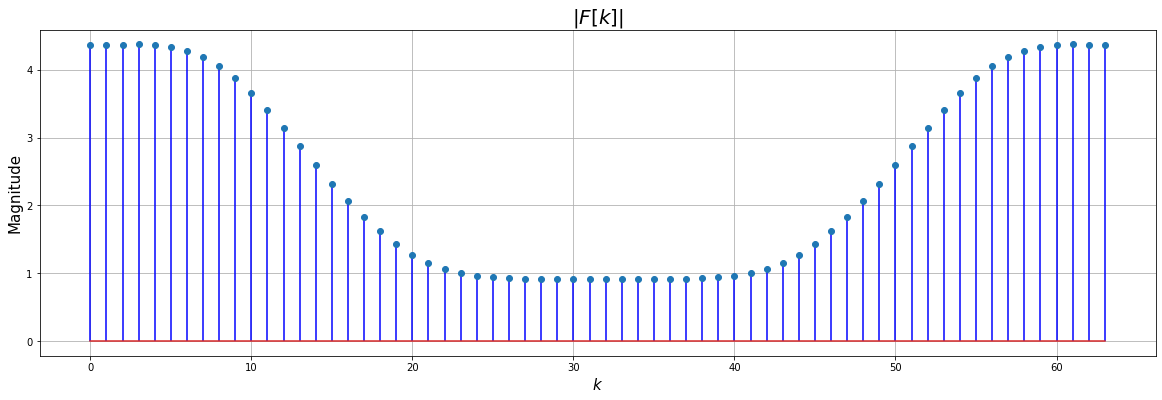

In [15]:
#q6 input,dft
x6 = np.arange(64)
q6_f = np.exp(-1*(x6**2)/10) * (np.sin(2*x6/(2*np.pi))  + 2*np.cos(4*x6/(2*np.pi)) + 0.4*np.sin(1*x6/(2*np.pi))*np.sin(10*x6/(2*np.pi)))
q6_f_dft = np.dot(DFT_Matrix(64),q6_f)

#plotting fn,mag
plt.stem(x6,q6_f) 
plt.xlabel('n' , size = 15 )
plt.ylabel('Amplitude' , size = 15 )
plt.title('$f[n]$' , size = 20)
plt.grid()
plt.show()

plt.stem(x6,np.abs(q6_f_dft) , 'b')
plt.title(r'$\|F[k]|$' , size= 20)
plt.xlabel('$k$' , size = 15)
plt.ylabel('Magnitude' , size = 15 )
plt.grid()
plt.show()



## Q7
#### x[n] is a discrete time sequence given by:
$$ x[n] = (\frac{-1}{3})^{n} u[n] - (\frac{1}{2})^{n} u[-n-1]$$
#### where n is the discrete time sequence and u[n] is the unit step sequence.
#### (a) Find the Z-transform of x[n] denoted by X(z) (calculate manually). Plot x[n], the magnitude and phase spectra of X(z) on 3 different subplots. Also, visualize the real and imaginary parts of X(z) on a 3D plot.
#### (b) Find the Region of Convergence (ROC) of X(z) (calculate manually). Plot and visualize the poles, zeros and ROC of X(z) on a single subplot (for plotting ROC, draw circles and shade the appropriate region).

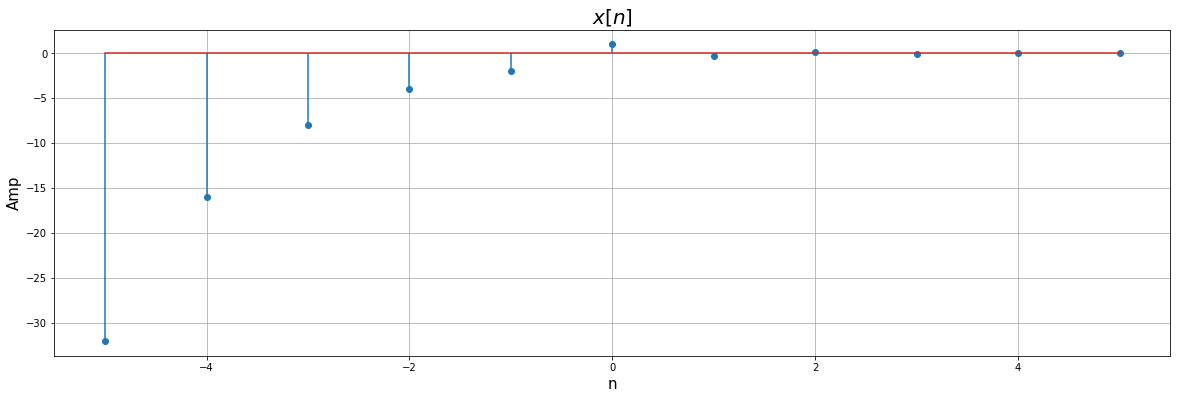

In [16]:
#q7 input
x7 = np.arange(-5,6)
term1=np.power(-1/3 , x7*(x7 >= 0))*(x7 >= 0)
term2=np.power(1/2 , x7*(x7 < 0))*(x7 < 0)
q7_xn = term1-term2

#plotting
plt.stem(x7 , q7_xn)
plt.xlabel('n' , size = 15 )
plt.ylabel('Amp' , size = 15 )
plt.title('$x[n]$' , size = 20 )
plt.grid()
plt.show()

#### Z-Transform of given signal:
##### $$\frac{2 - \frac{1}{6}z^{-1}}{(1+\frac{1}{3}z^{-1})(1-\frac{1}{2}z^{-1})};\ ROC:\ \frac{1}{3}<|z|<\frac{1}{2}$$

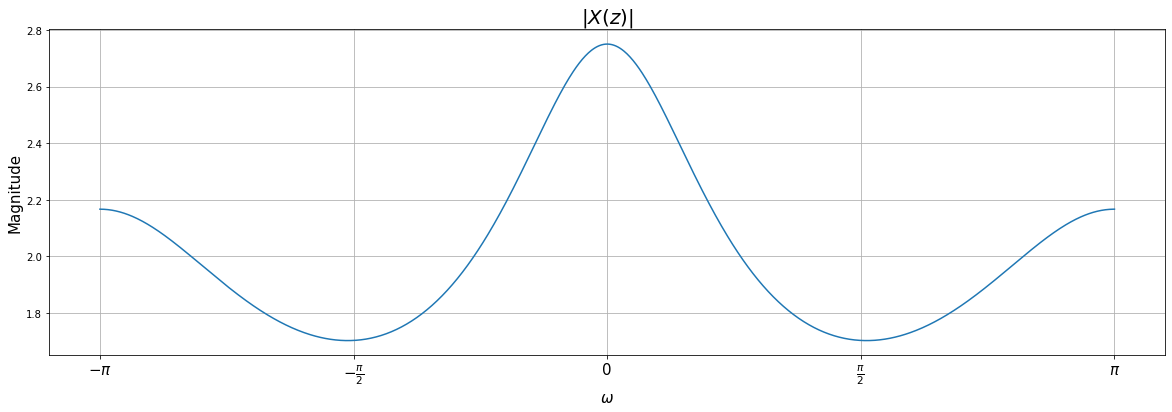

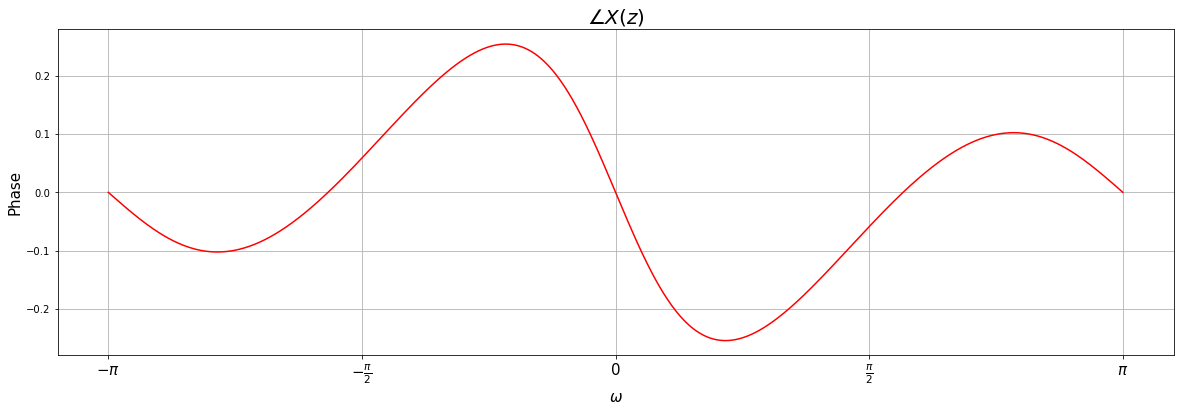

In [17]:
#q7 mag,ph,real,img,omg
q7_omg = np.linspace(-np.pi , np.pi , 1000)
num=(2 - (1/6)*np.exp(-1j * q7_omg))
den=((1+(1/3)*np.exp(-1j * q7_omg)) * (1-(1/2)*np.exp(-1j * q7_omg)) )
q7_z =  num/den 
q7_z_mag = np.abs(q7_z)
q7_z_phs = list(map(lambda x: cmath.phase(x) , q7_z))
q7_z_real=list(map(lambda x: x.real , q7_z))
q7_z_imag=list(map(lambda x: x.imag , q7_z))

#plotting
plt.plot(q7_omg , q7_z_mag)
plt.title(r'$\|X(z)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Magnitude', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()


plt.plot(q7_omg , q7_z_phs,'r')
plt.title(r'$\angle X(z)$' , size= 20)
plt.xlabel('$\omega$' , size = 15)
plt.ylabel('Phase', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()



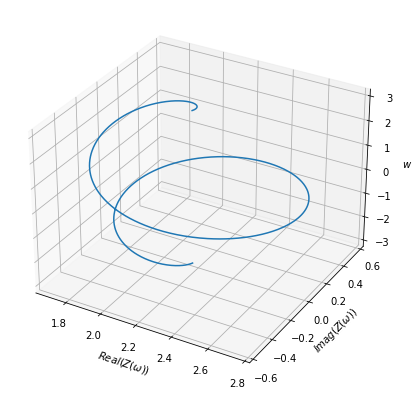

In [18]:
#3dplot
fig = plt.figure(figsize=(20,7))
ax = plt.axes(projection ='3d')
ax.plot(q7_z_real,q7_z_imag,q7_omg)
ax.set_xlabel(r'$Real(Z(\omega))$', weight = 'bold')
ax.set_ylabel(r'$Imag(Z(\omega))$', weight = 'bold')
ax.set_zlabel(r'$w$', weight = 'bold')
plt.show()


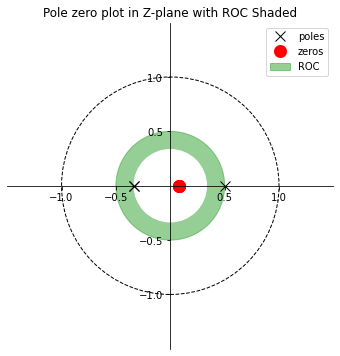

In [19]:
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
p = [-1/3,-1/3,1/2]
z = [1/12,1/12,1/12]
y = [0,0,0]
ax = plt.subplot(111)
uc = patches.Circle((0,0), radius=1, fill=False,color='black', ls='dashed')
ax.add_patch(uc)
# Plot the zeros and set marker properties    
t1 = plt.plot(p, y, 'rx', ms=10)
plt.setp( t1, markersize=10.0, markeredgewidth=1.0,markeredgecolor='k', markerfacecolor='g',label='poles')

# Plot the poles and set marker properties
t2 = plt.plot(z, y, 'go', ms=10)
plt.setp( t2, markersize=10.0, markeredgewidth=3.0,markeredgecolor='r', markerfacecolor='r',label='zeros')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#set the ticks
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
c0 = plt.Circle( (0, 0 ),1/12 ,fill = False ,ls = '--')
c1 = plt.Circle( (0, 0 ),1/3 ,fill = True ,  color = 'white' , animated = True ,aa = 'hu')
c2 = plt.Circle( (0, 0 ),1/2 ,fill = True , color =  '#2ca02c', alpha = 0.5,label='ROC')
ax.add_patch(c2)
ax.add_artist(c1)
plt.title('Pole zero plot in Z-plane with ROC Shaded')
plt.legend()
plt.show()

## Q8
#### For the z-transform, H(z), is given by:
$$ H(z) = \frac{18z^{3}}{18z^{3}+3z^{2}-4z-1}$$
#### (a) Determine and plot the zeros and poles of H(z). Also, plot its magnitude and phase spectra.
#### (b) Using partial fraction expansion, determine the ROC and inverse z-transform of H(z).

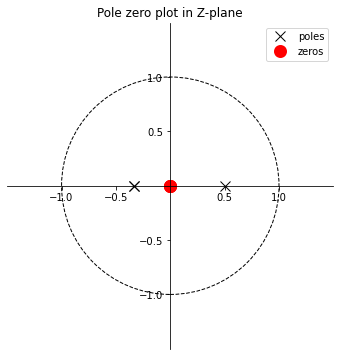

In [20]:
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
p = [-0.33333333 ,-0.33333333,  0.5]
z = [0, 0,0 ]
y = [0,0,0]
ax = plt.subplot(111)
uc = patches.Circle((0,0), radius=1, fill=False,color='black', ls='dashed')
ax.add_patch(uc)
# Plot the zeros and set marker properties    
t1 = plt.plot(p, y, 'rx', ms=10)
plt.setp( t1, markersize=10.0, markeredgewidth=1.0,markeredgecolor='k', markerfacecolor='g',label='poles')

# Plot the poles and set marker properties
t2 = plt.plot(z, y, 'go', ms=10)
plt.setp( t2, markersize=10.0, markeredgewidth=3.0,markeredgecolor='r', markerfacecolor='r',label='zeros')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#set the ticks
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
plt.title('Pole zero plot in Z-plane')
plt.legend()
plt.show()

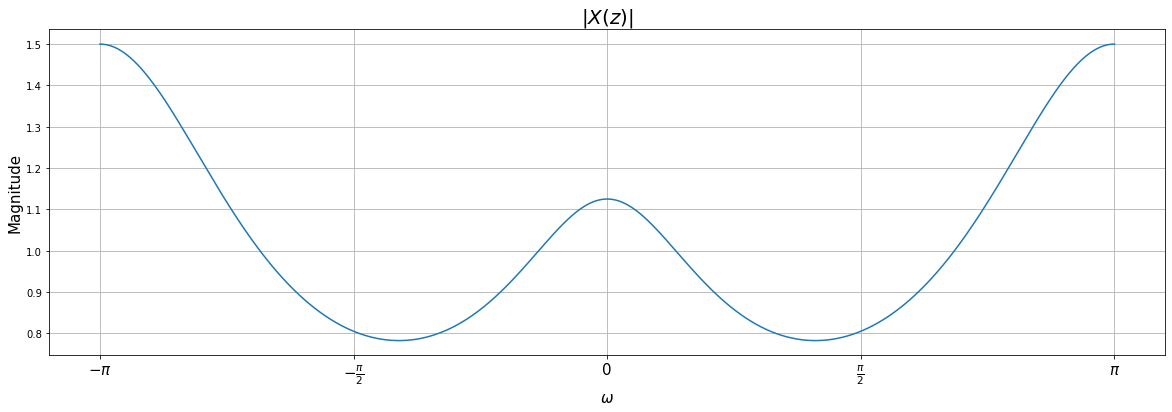

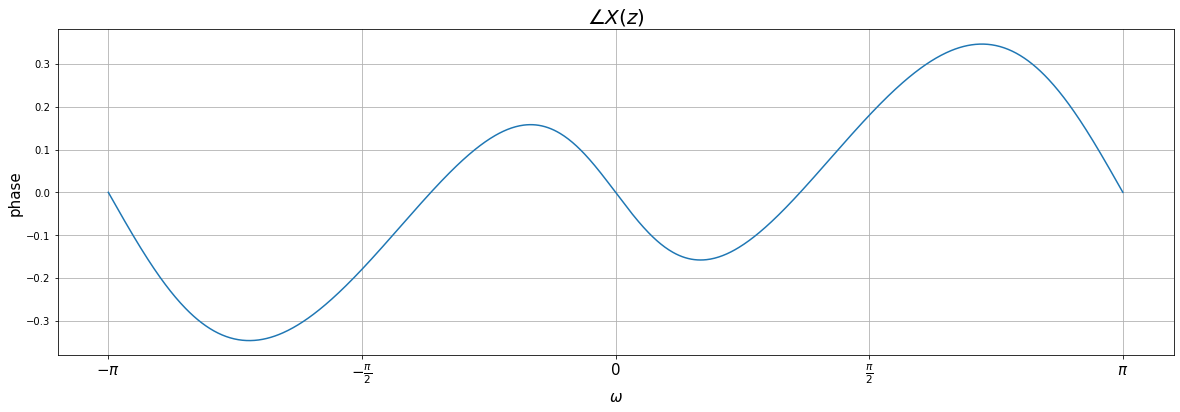

In [21]:
def q8_x(omg):
    return 18*np.exp(1j*3*omg)/(18*np.exp(1j*3*omg)+3*np.exp(1j*2*omg)-4*np.exp(1j*omg)-1)
q8_omg=np.linspace(-np.pi,np.pi,1000)

#plotting
plt.plot(q8_omg,abs(q8_x(q8_omg)))
plt.title(r'$\|X(z)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Magnitude', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()

phase=list(map(lambda x: cmath.phase(x) , q8_x(q8_omg)))
plt.plot(q8_omg,phase)
plt.title(r'$\angle X(z)$' , size= 20)
plt.xlabel('$\omega$' , size = 15)
plt.ylabel('phase', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()

In [22]:
# import sympy
from sympy import * 
z = symbols('z')
q8_exp1 = (18*z**2)/(18*z**3 + 3*z**2 - 4*z - 1)


# Using sympy.apart() method
exp1 = apart(q8_exp1)
display("Partial Fraction Expansion",exp1)


'Partial Fraction Expansion'

48/(25*(3*z + 1)) - 6/(5*(3*z + 1)**2) + 18/(25*(2*z - 1))

$$\frac{18z^{3}}{18z^{3}+3z^{2}-4z-1} = \frac{0.64z}{(z + \frac{1}{3})} - \frac{0.133z}{(z + \frac{1}{3})^2} + \frac{0.36z}{(z - \frac{1}{2})}$$

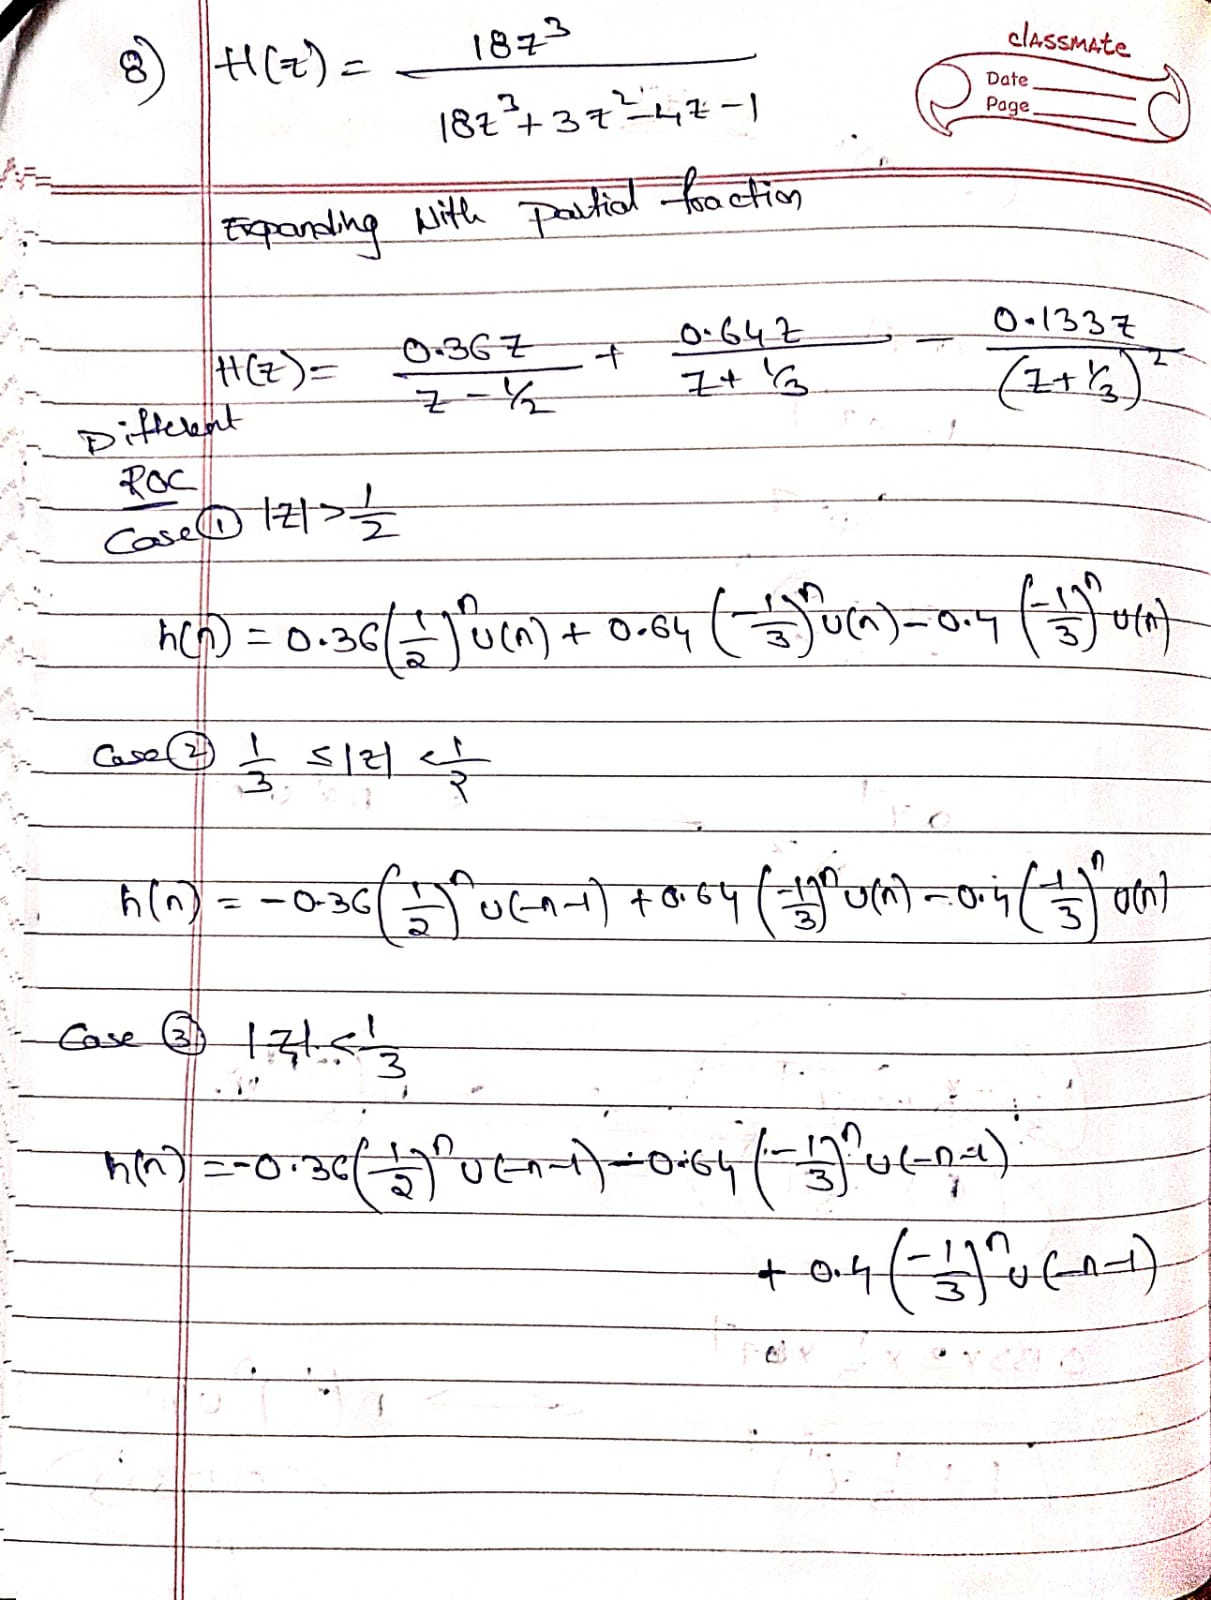

In [23]:
from IPython.display import Image
Image(filename='a408.jpeg',width=500, height=200)

In [24]:
#using lcapy library
import lcapy as lc
from lcapy.discretetime import z
#from lcapy import u
X0=(18*z**3)/(18*z**3 + 3*z**2 - 4*z - 1)
xk=X0.IZT()
display("Inverse Z TF(only one ROC is considered here by lcapy library)")
display(xk)

'Inverse Z TF(only one ROC is considered here by lcapy library)'

      n  -n                -n           
2⋅(-1) ⋅3  ⋅(5⋅n + 8)   9⋅2             
───────────────────── + ─────  for n ≥ 0
          25              25            

In [25]:
# using signal.residuez
b=[18,0,0,0]
a=[18,3,-4,-1]
r,p,k=signal.residuez(b, a, tol=0.001, rtype='avg')
print(r)
print(p)
print(k)

[0.24 0.4  0.36]
[-0.33333333 -0.33333333  0.5       ]
[]


## Q9
#### (a) Suppose you are given the ordinary differential equation that represents an LTI system,
####                       $        y^{(2)}(t) + 0.5y^{(1)}(t) + 0.15y(t) = x(t), t ≥ 0 $
#### where y(t) is the output and x(t) is the input of the system, y (1)(t) and y (2)(t) are first and second order derivatives with respect to t. The input is causal, i.e., x(t) = 0, t < 0. What should be the initial conditions for the system to be LTI? 
#### Find Y (s) for those initial conditions.
#### (b) If y (1)(0) = 1 and y(0) = 1 are the initial conditions for the above ordinary differential equation, find Y (s). If the input to the system is doubled, i.e., the input is 2x(t), is Y (s) doubled? Is the system linear?
#### (c) Find the solutions of the ordinary differential equation when the input is u(t) and 2u(t), with the initial conditions as given above.
#### Compare the solutions and verify your response in (b).

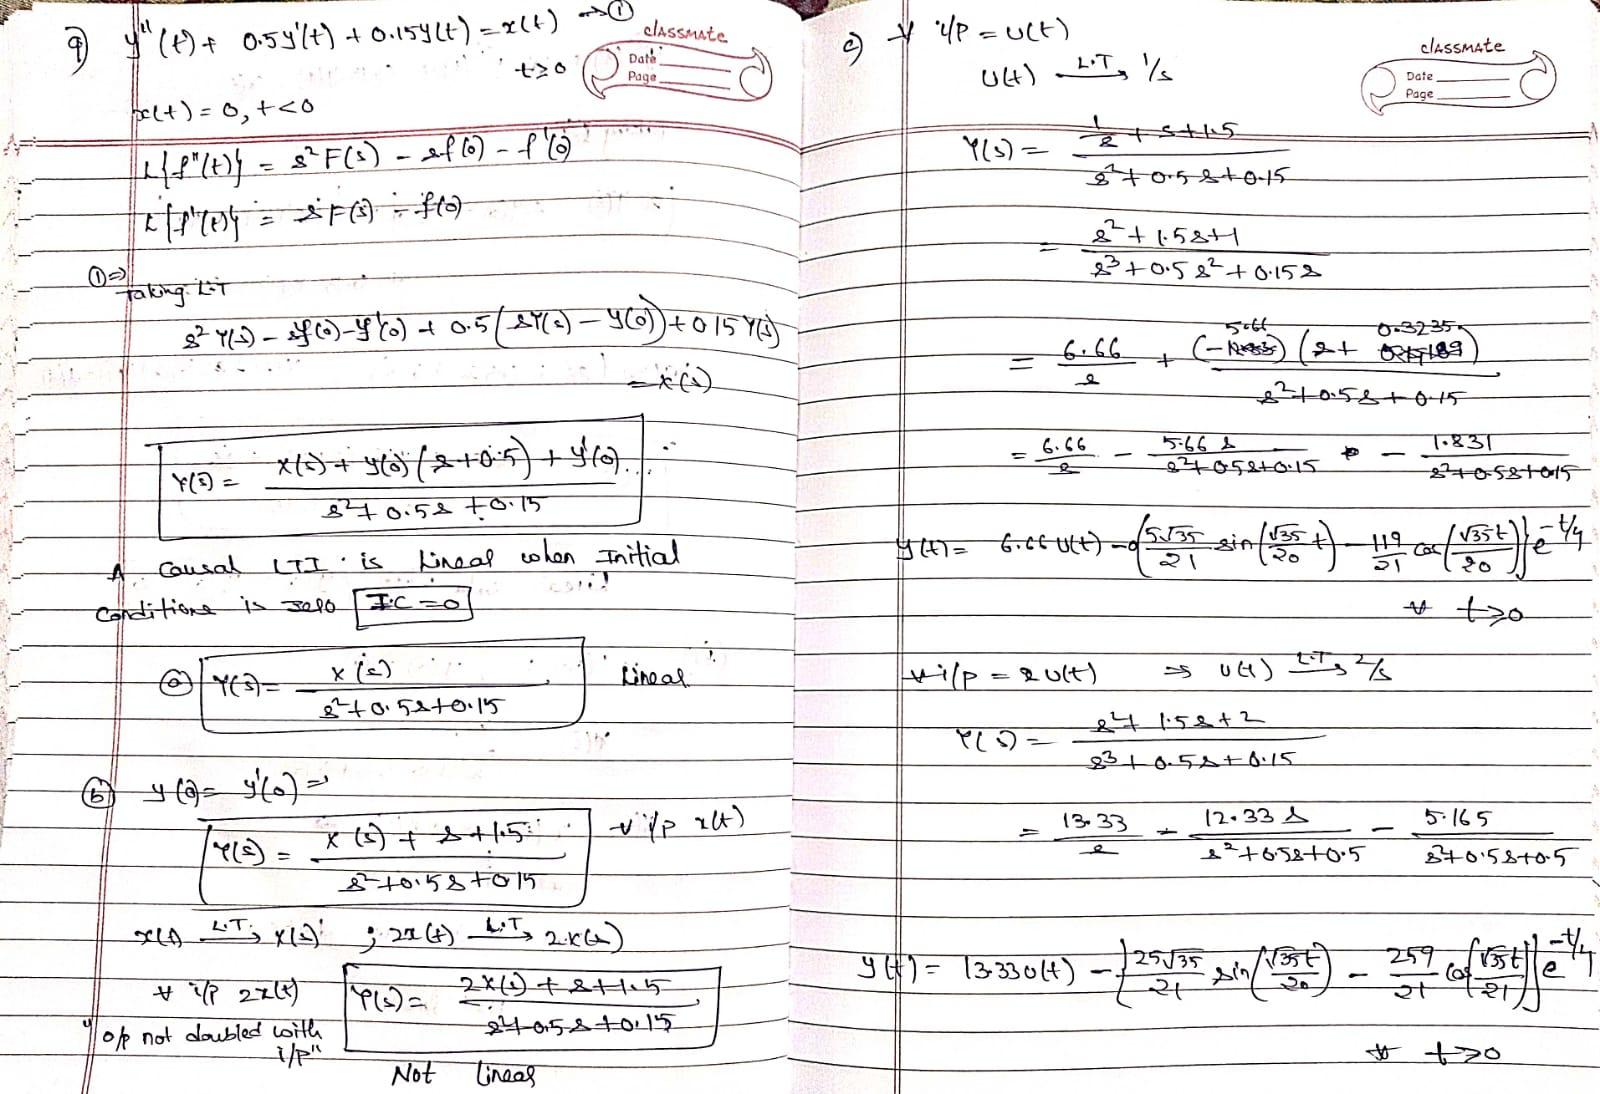

In [26]:
from IPython.display import Image
Image(filename='a409.jpeg',width=800, height=200)

'Partial Fraction Expansion for u(t)'

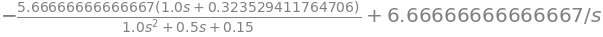

'Partial Fraction Expansion for 2u(t)'

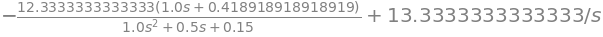

In [27]:
# import sympy
from sympy import * 
s = symbols('s')
exp1 = (s**2 + 1.5 * s + 1)/(s**3 + 0.5*s**2 + 0.15 * s)
exp2 = (s**2 + 1.5 * s + 2)/(s**3 + 0.5*s**2 + 0.15 * s)

# Using sympy.apart() method
exp_exp1 = apart(exp1)
display("Partial Fraction Expansion for u(t)",exp_exp1)

exp_exp2 = apart(exp2)
display("Partial Fraction Expansion for 2u(t)",exp_exp2)


In [28]:
#using lcapy library
from lcapy import s
exp1 = (s**2 + 1.5 * s + 1)/(s**3 + 0.5*s**2 + 0.15 * s)
exp2 = (s**2 + 1.5 * s + 2)/(s**3 + 0.5*s**2 + 0.15 * s)


display(simplify(exp1.ILT()))
display(simplify(exp2.ILT()))

⎛     t                                    ⎞  -t            
⎜     ─                                    ⎟  ───           
⎜     4            ⎛√35⋅t⎞          ⎛√35⋅t⎞⎟   4            
⎜140⋅ℯ  - 5⋅√35⋅sin⎜─────⎟ - 119⋅cos⎜─────⎟⎟⋅ℯ              
⎝                  ⎝  20 ⎠          ⎝  20 ⎠⎠                
─────────────────────────────────────────────────  for t ≥ 0
                        21                                  

⎛     t                                     ⎞  -t            
⎜     ─                                     ⎟  ───           
⎜     4             ⎛√35⋅t⎞          ⎛√35⋅t⎞⎟   4            
⎜280⋅ℯ  - 25⋅√35⋅sin⎜─────⎟ - 259⋅cos⎜─────⎟⎟⋅ℯ              
⎝                   ⎝  20 ⎠          ⎝  20 ⎠⎠                
──────────────────────────────────────────────────  for t ≥ 0
                        21                                   

In [29]:
# using signal.residuez

b=[0,1,1.5,1]
a=[1,0.5,0.15,0]
print('for u(t)')
r,p,k=signal.residuez(b, a, tol=0.001, rtype='avg')
print('r=',r)
print('p=',p)
print('k=',k)

b=[0,1,1.5,2]
a=[1,0.5,0.15,0]
r,p,k=signal.residuez(b, a, tol=0.001, rtype='avg')
print('for 2u(t)')
print('r=',r)
print('p=',p)
print('k=',k)

for u(t)
r= [6.11111111+4.41358333j 6.11111111-4.41358333j]
p= [-0.25+0.29580399j -0.25-0.29580399j]
k= [-12.22222222   6.66666667]
for 2u(t)
r= [17.22222222+6.2917039j 17.22222222-6.2917039j]
p= [-0.25+0.29580399j -0.25-0.29580399j]
k= [-34.44444444  13.33333333]


## Q10
#### We are given the following five facts about a real signal x(t) with Laplace transform X(s):
#### • X(s) has exactly two pole
#### • X(s) has no zeros in the finite s-plane.
#### • X(s) has a pole at s = -1 + j.
#### • $e^{2t}x(t) $is not absolutely integrable.
#### • X(0) = 8.
#### Determine X(s) and specify its region of convergence. Also plot its poles.


######    $ X(s) = \frac{16}{s^{2}+2s+2}$;ROC is Re(s) > -1 

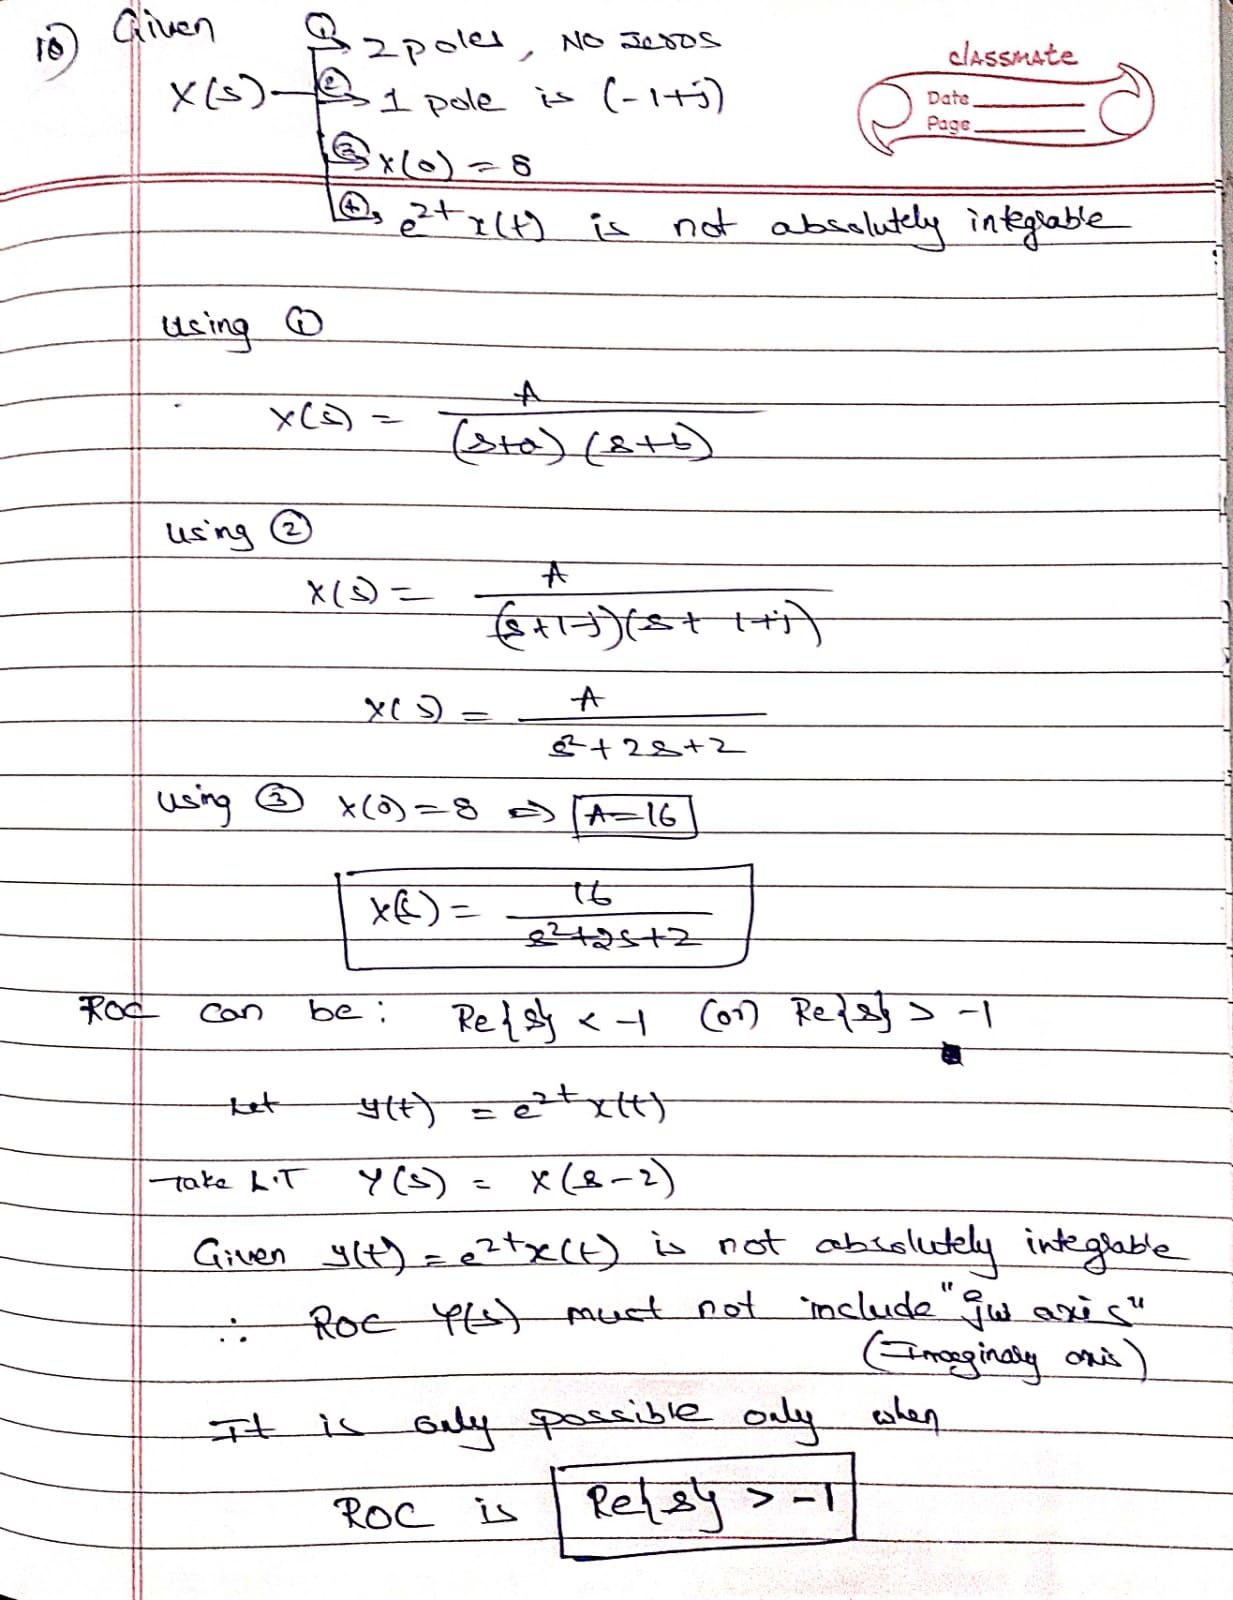

In [30]:
from IPython.display import Image
Image(filename='a410.jpeg',width=500, height=200)

The poles of given Transfer Function is: [-1.+1.j -1.-1.j]


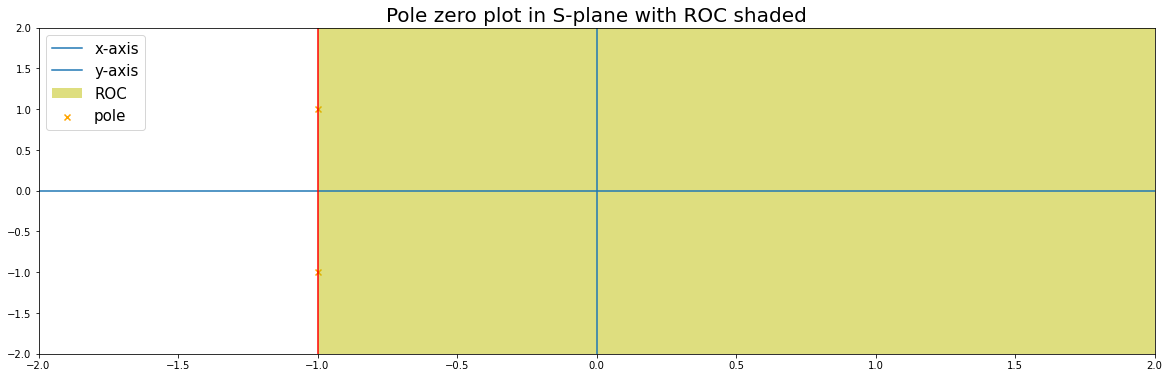

In [31]:
# using signal.residuez
z,p,k=signal.tf2zpk([0,0,16], [1,2,2])

print(f'The poles of given Transfer Function is:',p)

#plotting
plt.axhline(0,label='x-axis')
plt.axvline(0,label='y-axis')
plt.scatter(p.real,p.imag,marker="x",label='pole',c='orange')
plt.axvline(p[0],color='r')
plt.axvspan(-1 ,2, color='y', alpha=0.5, lw=0,label='ROC')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Pole zero plot in S-plane with ROC shaded',size=20)
plt.legend(prop = {'size':15})
plt.show()

#### THE END